In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import string
from nltk.corpus import stopwords
import csv

In [84]:
path = "C:\\Users\\PC\OneDrive\\Dokumente\\SMSSpamCollection"
#try:
df = pd.read_csv(path, encoding='latin-1', sep = '\t', on_bad_lines='skip')  # Adjust sep if necessary
print(df.head())  # Display the first few rows of the DataFrame
#except pd.errors.ParserError as e:
    #print(f"ParserError: {e}")
#except Exception as e:
    #print(f"An error occurred: {e}")

    ham  \
0   ham   
1  spam   
2   ham   
3   ham   
4  spam   

  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
0                      Ok lar... Joking wif u oni...                                                               
1  Free entry in 2 a wkly comp to win FA Cup fina...                                                               
2  U dun say so early hor... U c already then say...                                                               
3  Nah I don't think he goes to usf, he lives aro...                                                               
4  FreeMsg Hey there darling it's been 3 week's n...                                                               


In [86]:
df.columns = ["label", "message"]
df.columns

Index(['label', 'message'], dtype='object')

In [88]:
pd.set_option("display.max_rows", None)
df['label'].value_counts()

label
ham     4824
spam     747
Name: count, dtype: int64

In [90]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ''  # Return an empty string for non-string inputs
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(text)  # Join the cleaned words back into a single string

df['message'] = df['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)

# Transform the messages into vectors
X = vectorizer.fit_transform(df['message']).toarray()

# Encode the labels: ham -> 0, spam -> 1
y = pd.get_dummies(df['label'], drop_first=True).values.ravel()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [96]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 98.12%
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       955
        True       1.00      0.87      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[955   0]
 [ 21 139]]


<Axes: >

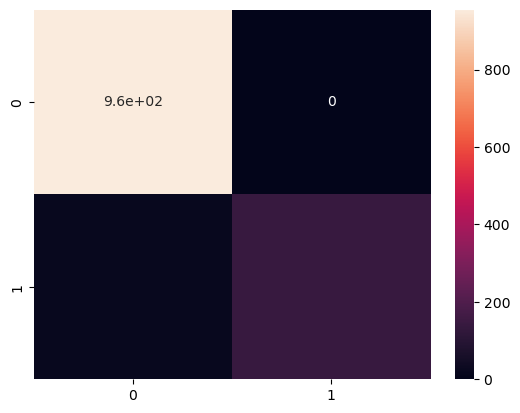

In [112]:
import seaborn as sns
sns.heatmap(conf_matrix, annot = True)

In [104]:
# Get the features and their corresponding coefficients
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities of the features for each class
spam_log_prob = model.feature_log_prob_[1]  # Class 1 typically represents spam in binary classification
ham_log_prob = model.feature_log_prob_[0]   # Class 0 typically represents ham
spam_words = sorted(zip(spam_log_prob, feature_names), reverse=True)

# Print the top 10 most indicative words for spam
print("Top 10 spam words:", spam_words[:10])

Top 10 spam words: [(-4.815514378287279, 'call'), (-5.08374242443187, 'free'), (-5.422054729101539, 'txt'), (-5.470152313925235, 'mobile'), (-5.4782017794059135, 'stop'), (-5.535683805622681, 'claim'), (-5.566636036098614, 'text'), (-5.681234745652097, 'prize'), (-5.685527254232548, 'ur'), (-5.70371246003332, 'reply')]


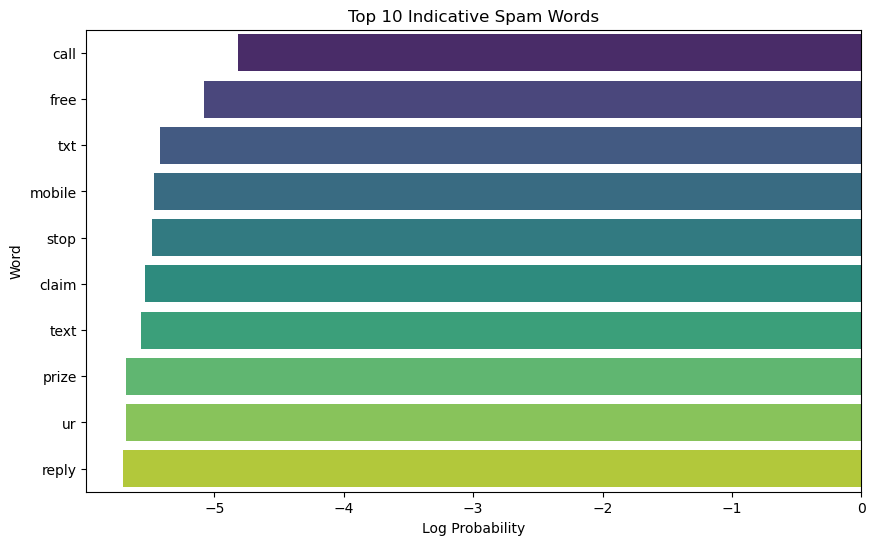

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert your top spam words into a DataFrame for plotting
import pandas as pd

# Assuming spam_words is a list of tuples (log_prob_value, word)
top_spam_words = spam_words[:10]

# Create a DataFrame from the top 10 words
df_spam_words = pd.DataFrame(top_spam_words, columns=['Log Probability', 'Word'])

# Plot using seaborn barplot, and adjust the orientation to horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Log Probability', y='Word', data=df_spam_words, palette='viridis')

# Show the plot
plt.title('Top 10 Indicative Spam Words')
plt.show()